In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
print(pd.__version__)
print(sns.__version__)

1.4.1
0.11.2


In [3]:
df = pd.read_csv('./eda_csv/olist_order_reviews_dataset.csv', )
df

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13


In [4]:
df.columns

Index(['review_id', 'order_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [6]:
df.shape

(99224, 7)

## 결측 데이터 확인

In [7]:
df.isnull().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

<AxesSubplot:>

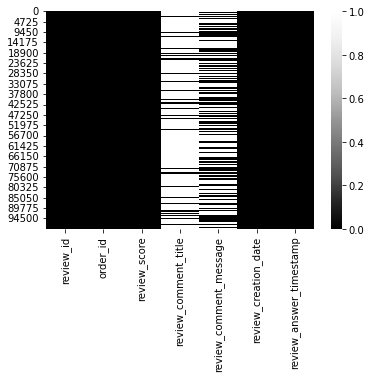

In [8]:
sns.heatmap(df.isnull(), cmap="Greys_r")

리뷰 데이터의 리뷰제목 대부분 99224건 중 87656 건이 비어있고, 58247 건이 리뷰가 없다.

In [9]:
df.isnull().mean()*100

review_id                   0.000000
order_id                    0.000000
review_score                0.000000
review_comment_title       88.341530
review_comment_message     58.702532
review_creation_date        0.000000
review_answer_timestamp     0.000000
dtype: float64

# message vs title

### 메세지랑 타이틀 둘다 있는 것 

In [27]:
df_toco = df[(df['review_comment_title'].notna())&(df['review_comment_message'].notna())]

In [28]:
df_toco.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
9,8670d52e15e00043ae7de4c01cc2fe06,b9bf720beb4ab3728760088589c62129,4,recomendo,aparelho eficiente. no site a marca do aparelh...,2018-05-22 00:00:00,2018-05-23 16:45:47
15,3948b09f7c818e2d86c9a546758b2335,e51478e7e277a83743b6f9991dbfa3fb,5,Super recomendo,"Vendedor confiável, produto ok e entrega antes...",2018-05-23 00:00:00,2018-05-24 03:00:01
19,373cbeecea8286a2b66c97b1b157ec46,583174fbe37d3d5f0d6661be3aad1786,1,Não chegou meu produto,Péssimo,2018-08-15 00:00:00,2018-08-15 04:10:37
22,d21bbc789670eab777d27372ab9094cc,4fc44d78867142c627497b60a7e0228a,5,Ótimo,Loja nota 10,2018-07-10 00:00:00,2018-07-11 14:10:25
34,c92cdd7dd544a01aa35137f901669cdf,37e7875cdce5a9e5b3a692971f370151,4,Muito bom.,Recebi exatamente o que esperava. As demais en...,2018-06-07 00:00:00,2018-06-09 18:44:02


In [29]:
df_toco.shape

(9839, 7)

문자열 길이 살펴보기

In [30]:
df_toco['review_comment_title'].str.len().describe()

count    9839.000000
mean       12.214961
std         6.314264
min         1.000000
25%         8.000000
50%        11.000000
75%        17.000000
max        26.000000
Name: review_comment_title, dtype: float64

In [31]:
df_toco['review_comment_message'].str.len().describe()

count    9839.000000
mean       68.987702
std        54.112101
min         1.000000
25%        28.000000
50%        53.000000
75%        95.000000
max       204.000000
Name: review_comment_message, dtype: float64

남긴 날짜

In [53]:
df_toco['review_creation_date'].sort_values()

56047    2017-05-16 00:00:00
39291    2017-06-29 00:00:00
92599    2017-09-13 00:00:00
50256    2017-10-27 00:00:00
13099    2017-10-29 00:00:00
                ...         
97524    2018-08-31 00:00:00
17417    2018-08-31 00:00:00
82362    2018-08-31 00:00:00
47953    2018-08-31 00:00:00
90695    2018-08-31 00:00:00
Name: review_creation_date, Length: 9839, dtype: object

리뷰 점수 살펴보기

In [33]:
df_toco['review_score'].describe()

count    9839.000000
mean        3.837585
std         1.556435
min         1.000000
25%         3.000000
50%         5.000000
75%         5.000000
max         5.000000
Name: review_score, dtype: float64

### 메세지는 있지만 타이틀이 없는 것

In [34]:
df_txco = df[(df['review_comment_title'].isna())&(df['review_comment_message'].notna())]

In [35]:
df_txco.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
12,4b49719c8a200003f700d3d986ea1a19,9d6f15f95d01e79bd1349cc208361f09,4,NaN,"Mas um pouco ,travando...pelo valor ta Boa.\r\n",2018-02-16 00:00:00,2018-02-20 10:52:22
16,9314d6f9799f5bfba510cc7bcd468c01,0dacf04c5ad59fd5a0cc1faa07c34e39,2,NaN,"GOSTARIA DE SABER O QUE HOUVE, SEMPRE RECEBI E...",2018-01-18 00:00:00,2018-01-20 21:25:45
24,0e0190b9db53b689b285d3f3916f8441,79832b7cb59ac6f887088ffd686e1d5e,5,NaN,obrigado pela atençao amim dispensada,2017-12-01 00:00:00,2017-12-09 22:58:58


In [36]:
df_txco.shape

(31138, 7)

문자열 길이 살펴보기

In [38]:
df_txco['review_comment_message'].str.len().describe()

count    31138.000000
mean        68.527073
std         53.766268
min          1.000000
25%         28.000000
50%         53.000000
75%         94.000000
max        208.000000
Name: review_comment_message, dtype: float64

남긴 날짜 보기

In [52]:
df_txco['review_creation_date'].sort_values()

70906    2016-10-02 00:00:00
37547    2016-10-06 00:00:00
5503     2016-10-09 00:00:00
41042    2016-10-15 00:00:00
28075    2016-10-16 01:00:00
                ...         
30370    2018-08-31 00:00:00
79007    2018-08-31 00:00:00
22684    2018-08-31 00:00:00
62350    2018-08-31 00:00:00
85806    2018-08-31 00:00:00
Name: review_creation_date, Length: 31138, dtype: object

리뷰 점수 살펴보기

In [40]:
df_txco['review_score'].describe()

count    31138.000000
mean         3.616867
std          1.630052
min          1.000000
25%          2.000000
50%          4.000000
75%          5.000000
max          5.000000
Name: review_score, dtype: float64

### 제목은 없지만 메세지는 있는 것

In [41]:
df_tocx = df[(df['review_comment_title'].notna())&(df['review_comment_message'].isna())]

In [42]:
df_tocx.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
53,1edd1a85161468a77e5fcb165be9b294,d8e17cc85323061493b16b68a130bcff,5,Ótimo,NaN,2018-06-02 00:00:00,2018-06-02 23:15:37
104,352609f0f2d34ce5d3b8de817ee948d5,96b947c986b42f213c9e6b8ccccedb89,3,Não recebi o produto.,NaN,2018-08-25 00:00:00,2018-08-25 20:53:41
220,a89a2b0c2014bc49a0f87f1eedb7b269,22b1eef278d4416c1e867a55d1c39fea,5,Entrega antes do previsto,NaN,2018-05-26 00:00:00,2018-05-28 22:46:27
225,cdc5c81bd9377ccbf9cb95f05648c31b,18956b40b774d6384c8539cd61784bd7,5,Recomendo,NaN,2018-06-22 00:00:00,2018-06-24 23:07:08
495,b50001aa0bbd7557c4ad80eee167a2a1,daece90b61801c766fe21e0922574566,5,Ótimo,NaN,2018-05-05 00:00:00,2018-05-07 17:12:36


In [43]:
df_tocx.shape

(1729, 7)

문자열 길이 살펴보기

In [46]:
df_tocx['review_comment_title'].str.len().describe()

count    1729.000000
mean       10.408907
std         6.191013
min         1.000000
25%         5.000000
50%         9.000000
75%        15.000000
max        25.000000
Name: review_comment_title, dtype: float64

리뷰 남긴 날짜 살펴보기

In [54]:
df_tocx['review_creation_date'].sort_values()

56519    2017-09-01 00:00:00
94448    2017-12-16 00:00:00
48187    2017-12-30 00:00:00
40419    2018-02-09 00:00:00
82548    2018-03-21 00:00:00
                ...         
89956    2018-08-31 00:00:00
26818    2018-08-31 00:00:00
6015     2018-08-31 00:00:00
65726    2018-08-31 00:00:00
10286    2018-08-31 00:00:00
Name: review_creation_date, Length: 1729, dtype: object

리뷰 점수 살펴보기

In [48]:
df_tocx['review_score'].describe()

count    1729.000000
mean        4.495662
std         1.001797
min         1.000000
25%         4.000000
50%         5.000000
75%         5.000000
max         5.000000
Name: review_score, dtype: float64

# score data
## eda

In [24]:
df.describe()

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


### score lineplot with date

<AxesSubplot:xlabel='review_creation_date', ylabel='review_score'>

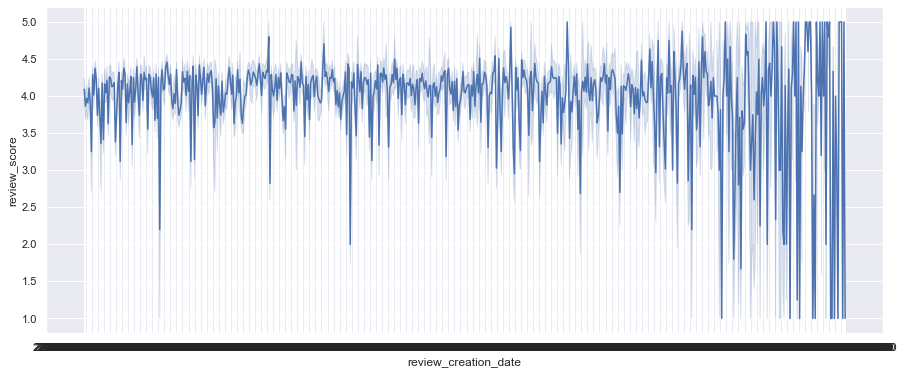

In [32]:
sns.set(rc = {'figure.figsize':(15,6)})
sns.lineplot(y = df['review_score'], x = df['review_creation_date'])

### score lineplot with message

In [ ]:
sns.set(rc = {'figure.figsize':(15,6)})
sns.lineplot(y = df['review_score'], x = df['review_creation_date'])